In [32]:
import pandas as pd

df_conv = pd.read_json("hf://datasets/Senqiao/LISA_Plus_Conversations/data.json")
df_inst = pd.read_json("hf://datasets/Senqiao/LISA_Plus_Instance_Seg/data.json")
df_caps = pd.read_json("hf://datasets/Senqiao/LISA_Plus_Caption/data.json")
df_COTs = pd.read_json("hf://datasets/Senqiao/LISA_Plus_COT/data.json")

df_inst.head()

,English Question,English Answer,ID,points,img_path
0,Identify the piece of furniture that is used f...,"instance id is 390693, label name is dining table",[390693],"{'390693': {'label name': 'dining table', 'poi...",000000307323.jpg
1,Locate the item meant for mass transit and typ...,"instance id is 171530, label name is train; in...","[171530, 172439]","{'171530': {'label name': 'train', 'points': [...",000000232954.jpg
2,"In the image presented, which non-motorized it...","instance id is 643282, label name is skateboar...","[643282, 1473551]","{'643282': {'label name': 'skateboard', 'point...",000000406404.jpg
3,Could you help segment out the people present ...,"instance id is 479884, label name is person; i...","[479884, 513239, 1203115]","{'479884': {'label name': 'person', 'points': ...",000000307768.jpg
4,Can you point out the piece of technology in t...,"instance id is 29475, label name is tv",[29475],"{'29475': {'label name': 'tv', 'points': [[[93...",000000389595.jpg


In [55]:
df_inst.iloc[9]

English Question    What feature on this creature is typically use...
English Answer               instance id is 42866, label name is bird
ID                                                            [42866]
points              {'42866': {'label name': 'bird', 'points': [[[...
img_path                                             000000440706.jpg
Name: 9, dtype: object


Object 42866:
Points shape: 22
X range: 205.21 to 305.99
Y range: 136.5 to 293.16


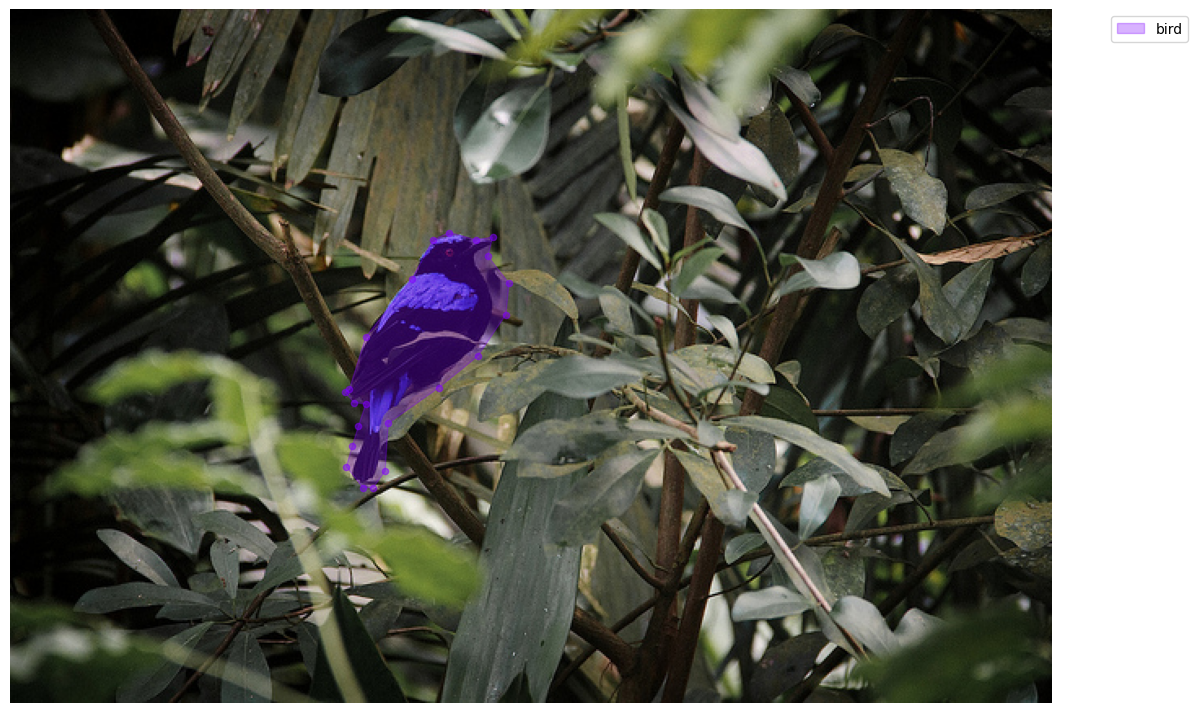


[Question]: What feature on this creature is typically used for flight?
[Answer]: instance id is 42866, label name is bird


In [63]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import ast
import json

def visualize_sample_inst(row):
    plt.figure(figsize=(12, 8))
    
    # Load and display image
    img_path = "coco2017/train2017/" + row['img_path']
    img = Image.open(img_path)
    plt.imshow(img)
    
    points_data = row['points']
    if isinstance(points_data, str):
        points_data = ast.literal_eval(points_data)
    
    num_objects = len(points_data)
    colors = plt.cm.rainbow(np.linspace(0, 1, num_objects))
    
    for (obj_id, obj_info), color in zip(points_data.items(), colors):
        polygon = obj_info['points']
        # Extract coordinates directly from the points list
        x_coords = [point[0] for point in polygon[0]]  # Changed indexing
        y_coords = [point[1] for point in polygon[0]]  # Changed indexing
        
        # Debug info
        print(f"\nObject {obj_id}:")
        print(f"Points shape: {len(polygon[0])}")
        print(f"X range: {min(x_coords)} to {max(x_coords)}")
        print(f"Y range: {min(y_coords)} to {max(y_coords)}")
        
        # Plot polygon
        plt.fill(x_coords, y_coords, 
                color=color, 
                alpha=0.3,
                label=f"{obj_info['label name']}")
        
        # Add points for debugging
        plt.scatter(x_coords, y_coords, color=color, s=20, alpha=0.5)
    
    plt.axis('off')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    print(f"\n[Question]: {row['English Question']}")
    print(f"[Answer]: {row['English Answer']}")

# Test with first row
visualize_sample_inst(df_inst.iloc[9])